## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 6.0244 - acc: 0.2668 - val_loss: 5.8192 - val_acc: 0.3376
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 5.7296 - acc: 0.3611 - val_loss: 5.6532 - val_acc: 0.3739
Epoch 3/50
50000/50000 [==============================] - 6s 130us/step - loss: 5.5816 - acc: 0.3921 - val_loss: 5.5168 - val_acc: 0.4016
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 5.4594 - acc: 0.4145 - val_loss: 5.4136 - val_acc: 0.4180
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 5.3506 - acc: 0.4274 - val_loss: 5.2999 - val_acc: 0.4370
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 5.2477 - acc: 0.4414 - val_loss: 5.2180 - val_acc: 0.4370
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 5.1542 - acc: 0.4540 - val_loss: 5.1264 - 

50000/50000 [==============================] - 7s 140us/step - loss: 2.0168 - acc: 0.2867 - val_loss: 1.8548 - val_acc: 0.3543
Epoch 2/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7911 - acc: 0.3694 - val_loss: 1.7421 - val_acc: 0.3867
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7094 - acc: 0.4000 - val_loss: 1.6694 - val_acc: 0.4166
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6491 - acc: 0.4217 - val_loss: 1.6210 - val_acc: 0.4300
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5998 - acc: 0.4396 - val_loss: 1.5879 - val_acc: 0.4417
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5599 - acc: 0.4530 - val_loss: 1.5583 - val_acc: 0.4509
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5241 - acc: 0.4650 - val_loss: 1.5274 - val_acc: 0.4588
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 135us/step - loss: 1.8089 - acc: 0.3633 - val_loss: 1.7701 - val_acc: 0.3819
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7249 - acc: 0.3934 - val_loss: 1.6996 - val_acc: 0.3944
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6695 - acc: 0.4137 - val_loss: 1.6532 - val_acc: 0.4115
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6231 - acc: 0.4288 - val_loss: 1.6080 - val_acc: 0.4369
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5849 - acc: 0.4425 - val_loss: 1.5946 - val_acc: 0.4341
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5512 - acc: 0.4550 - val_loss: 1.5558 - val_acc: 0.4535
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5226 - acc: 0.4649 - val_loss: 1.5358 - val_acc: 0.4562
Epoch 9/50
50000/50000 [=====================

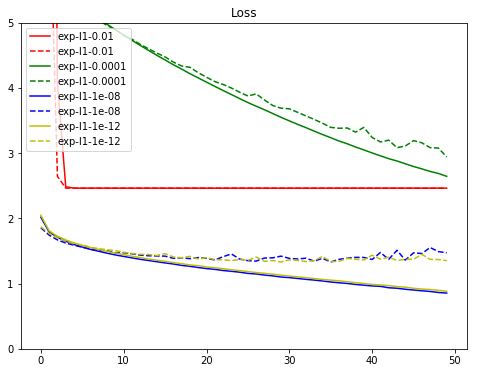

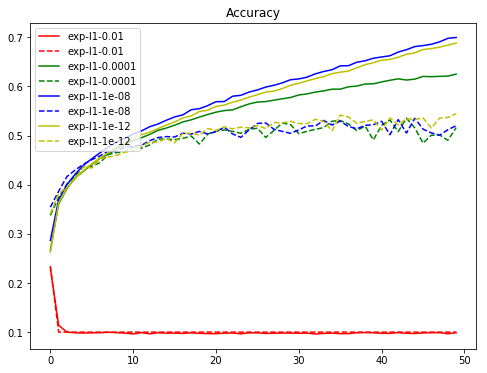

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 18.7854 - acc: 0.2639 - val_loss: 17.3460 - val_acc: 0.3419
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 16.1289 - acc: 0.3549 - val_loss: 14.9673 - val_acc: 0.3673
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 13.9453 - acc: 0.3785 - val_loss: 12.9623 - val_acc: 0.3856
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 12.0982 - acc: 0.3918 - val_loss: 11.2679 - val_acc: 0.3889
Epoch 5/50
50000/50000 [==============================] - 8s 150us/step - loss: 10.5288 - acc: 0.3989 - val_loss: 9.8187 - val_acc: 0.4061
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 9.1920 - acc: 0.4088 - val_loss: 8.5857 - val_acc: 0.4086
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 8.0541 - acc: 0.4142 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 7s 150us/step - loss: 12.9988 - acc: 0.3585 - val_loss: 12.1150 - val_acc: 0.3737
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 11.3304 - acc: 0.3795 - val_loss: 10.5839 - val_acc: 0.3843
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 9.9213 - acc: 0.3943 - val_loss: 9.2836 - val_acc: 0.4027
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 8.7227 - acc: 0.4035 - val_loss: 8.1815 - val_acc: 0.4113
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 7.7023 - acc: 0.4117 - val_loss: 7.2420 - val_acc: 0.4140
Epoch 7/50
50000/50000 [==============================] - 8s 150us/step - loss: 6.8314 - acc: 0.4179 - val_loss: 6.4428 - val_acc: 0.4174
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 6.0893 - acc: 0.4238 - val_loss: 5.7530 - val_acc: 0.4278
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 8s 158us/step - loss: 11.3439 - acc: 0.3836 - val_loss: 10.5901 - val_acc: 0.3924
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 9.9299 - acc: 0.3974 - val_loss: 9.2944 - val_acc: 0.4043
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 8.7274 - acc: 0.4077 - val_loss: 8.1868 - val_acc: 0.4136
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 7.7050 - acc: 0.4151 - val_loss: 7.2406 - val_acc: 0.4200
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 6.8321 - acc: 0.4225 - val_loss: 6.4413 - val_acc: 0.4220
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 6.0863 - acc: 0.4300 - val_loss: 5.7481 - val_acc: 0.4341
Epoch 9/50
50000/50000 [==============================] - 8s 158us/step - loss: 5.4515 - acc: 0.4327 - val_loss: 5.1744 - val_acc: 0.4379
Epoch 10/50
50000/50000 [==================

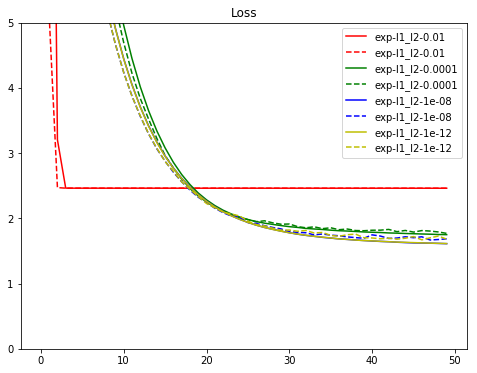

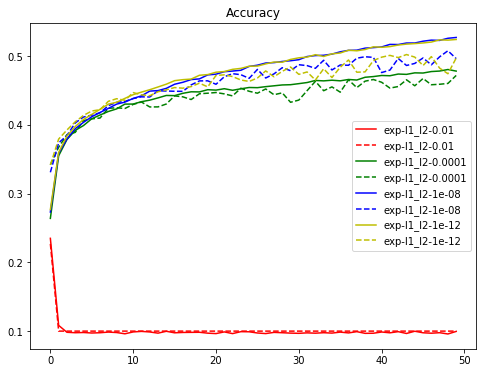

In [15]:
from keras.regularizers import l1, l2, l1_l2
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()